In [220]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product, combinations
import mpl_toolkits.mplot3d.art3d as art3d
import os
import moviepy.video.io.ImageSequenceClip

def blochPlot(u, v, w, index):
    # Initialize figure and 3D axis
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_box_aspect([1, 1, 1])  # Equal aspect ratio

    # Draw cube
    r = [-1, 1]
    for s, e in combinations(np.array(list(product(r, r, r))), 2):
        if np.sum(np.abs(s - e)) == r[1] - r[0]:
            ax.plot3D(*zip(s, e), color="b", ls=':')

    # Draw sphere
    phi, theta = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    x = np.cos(phi) * np.sin(theta)
    y = np.sin(phi) * np.sin(theta)
    z = np.cos(theta)
    ax.plot_wireframe(x, y, z, color="r", alpha=0.5)

    # Draw a point at the origin
    ax.scatter([0], [0], [0], color="m", s=60)


    # Function to draw a 3D arrow using Line3D and Quiver
    def draw_3d_arrow(ax, start, end, color="k"):
        start, end = np.array(start), np.array(end)
        
        # Draw line (shaft of arrow)
        ax.plot3D(*zip(start, end), color=color, lw=3)

        # Arrowhead using quiver
        vec = end - start
        ax.quiver(*end, *vec, color=color, arrow_length_ratio=0.5, lw=3)


    # Draw a 3D arrow from (0,0,0) to (1,1,1)
    draw_3d_arrow(ax, [0, 0, 0], [u/2., v/2., w/2.], color="k")

    # Show plot
    # plt.show()
    plt.savefig(f"./filetest{index}.png")


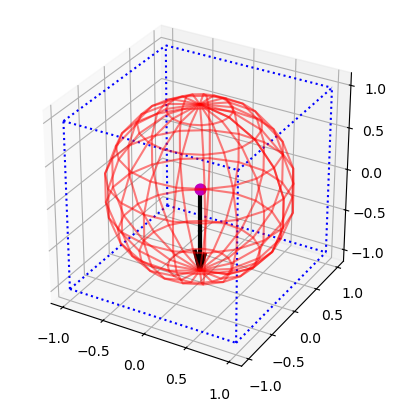

In [221]:
blochPlot(0, 0, -1, 0)

Begining the simulation:

In [222]:
from scipy.integrate import solve_ivp

In [223]:
import math

In [224]:
def rhs(t, y):
    
    if t < math.pi/2.:
        OmegaRe = 1
        OmegaIm = 0
        Delta = 0
    elif t < 6:
        OmegaRe = 0
        OmegaIm = 0
        Delta = 0.2
    elif t < 6 + math.pi:
        OmegaRe = 0
        OmegaIm = 1
        Delta = 0
    elif t < 6 + math.pi + (6-math.pi/2.):
        OmegaRe = 0
        OmegaIm = 0
        Delta = 0.2
    elif t < 6 + math.pi + (6-math.pi/2.) + 3.*math.pi/2.:
        OmegaRe = 1
        OmegaIm = 0
        Delta = 0
    else:
        OmegaRe = 0
        OmegaIm = 0
        Delta = 0
        
    return np.cross([OmegaRe, -OmegaIm, Delta], y)

u = 0
v = 0
w = -1
y0 = [u, v, w]

t0 = 0
tfinal = 20 # in units of 1/3 seconds
ts = np.linspace(t0, tfinal, 100)

sol = solve_ivp(rhs, [t0, tfinal], y0, t_eval=ts)

In [225]:
for i, elem in enumerate(sol.y.T):
    blochPlot(elem[0], elem[1], elem[2], i)
    plt.close('all')

image_folder = '.'
fps = 30

image_files = sorted([os.path.join(image_folder,img)
               for img in os.listdir(image_folder)
               if img.endswith(".png")], key = lambda x: int(x[10:][:-4]))
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
clip.write_videofile('my_video.mp4')

for file in image_files:
    os.remove(file)

MoviePy - Building video my_video.mp4.
MoviePy - Writing video my_video.mp4



MoviePy - Done !
MoviePy - video ready my_video.mp4
